In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load Dataset
df = pd.read_csv("heart.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


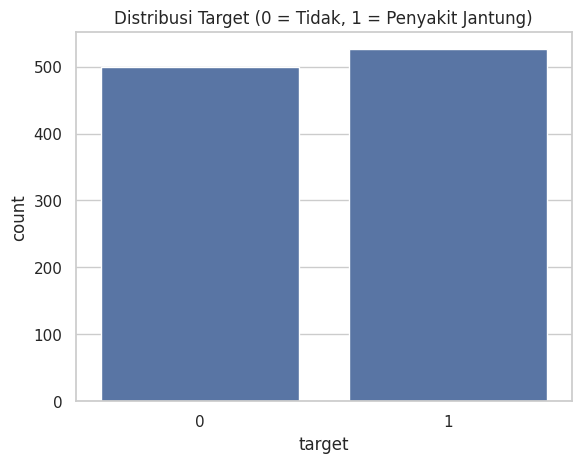

Accuracy: 0.8

Confusion Matrix:
 [[71 31]
 [10 93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



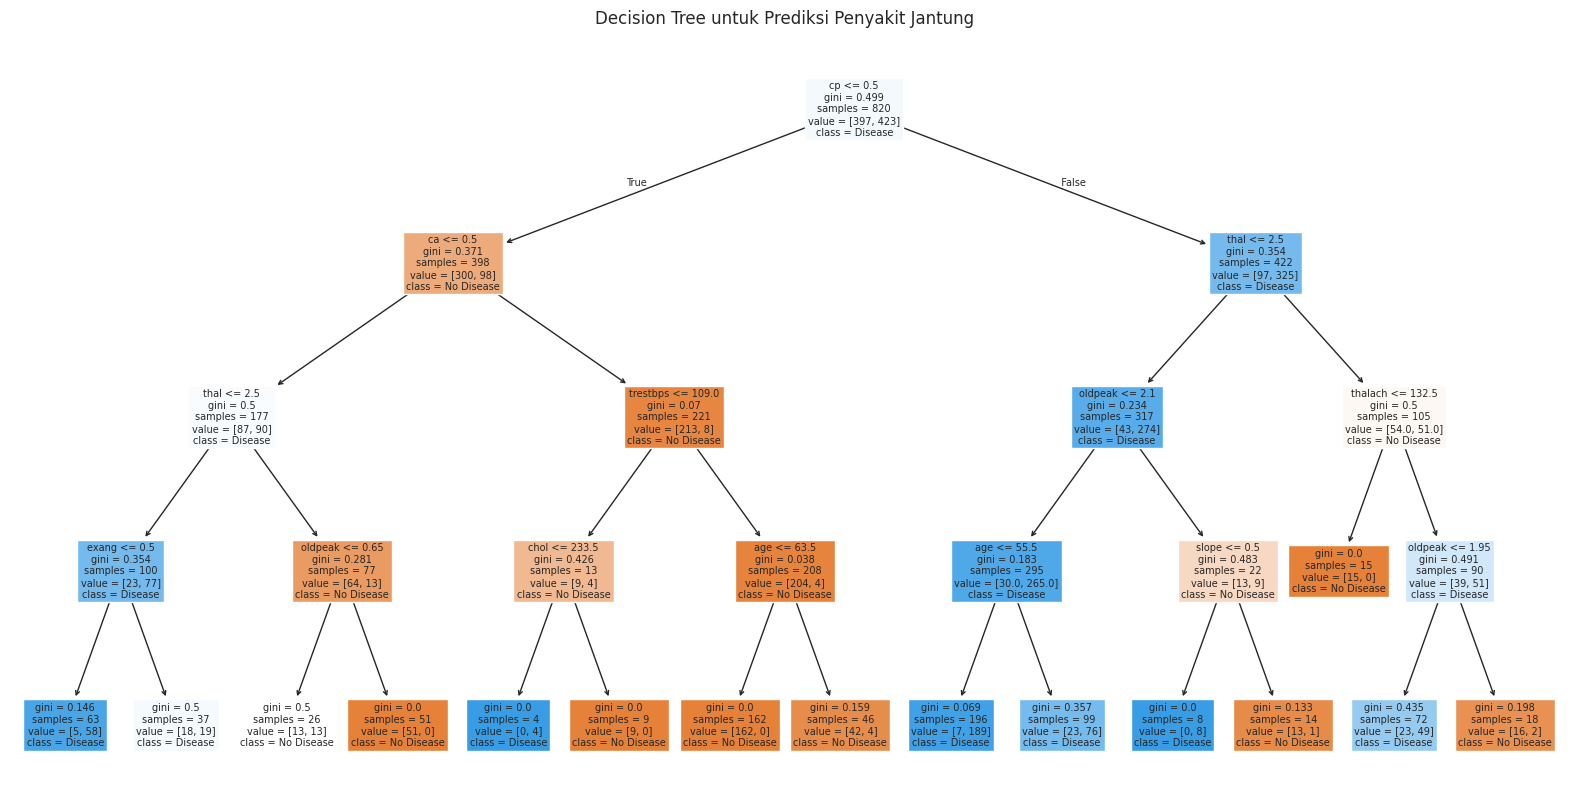

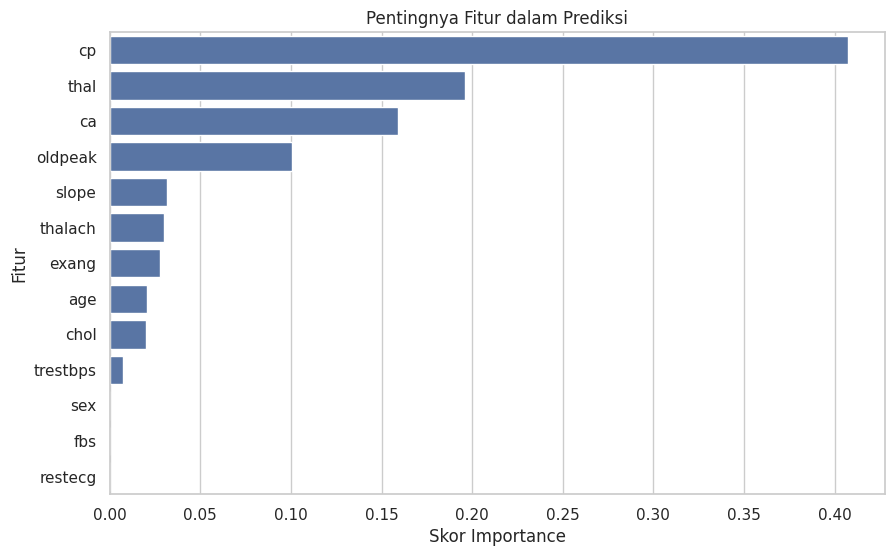

In [ ]:
# 3. Eksplorasi Data Singkat
df.info()
df.describe()
df['target'].value_counts()  # Cek distribusi label
sns.countplot(x='target', data=df)
plt.title("Distribusi Target (0 = Tidak, 1 = Penyakit Jantung)")
plt.show()

# 4. Persiapan Data (Fitur & Label)
X = df.drop("target", axis=1)
y = df["target"]

# Split Data: 80% latih, 20% uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Inisialisasi dan Latih Model Decision Tree
model = DecisionTreeClassifier(
    criterion="gini",       # bisa diganti ke "entropy"
    max_depth=4,            # batas kedalaman pohon
    random_state=42
)
model.fit(X_train, y_train)

# 6. Evaluasi Model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Visualisasi Pohon Keputusan
plt.figure(figsize=(20,10))
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names=["No Disease", "Disease"])
plt.title("Decision Tree untuk Prediksi Penyakit Jantung")
plt.show()

# 8. Pentingnya Fitur (Feature Importance)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Pentingnya Fitur dalam Prediksi")
plt.xlabel("Skor Importance")
plt.ylabel("Fitur")
plt.show()